# Neural networks
Lecturer: dr Andrzej Tomski, WSB-NLU  
Author: Andrzej Kocielski, 2023
___

## Exercise 2

Built an ANN to estimate price, using provided dataset, "CarPricesData.pkl".

Assumptions:
- The provided data is to be split into training and test sets.
- Sequential model from Keras is to be used.


### Importing libraries and set up

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler # used for standaristion of data
from sklearn.model_selection import train_test_split
from keras.models import Sequential # model of ANN
from keras.layers import Dense # layers of ANN

2023-12-03 21:08:46.732538: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-03 21:08:46.768665: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-03 21:08:46.768697: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-03 21:08:46.769689: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-03 21:08:46.775163: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-03 21:08:46.775852: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [ ]:
# To remove the scientific notation from numpy arrays
np.set_printoptions(suppress=True)

### Load and inspect data

In [2]:
# Load dataset from file
CarPricesData = pd.read_pickle('CarPricesData.pkl')
# Data inspection
print(f"Shape of dataframe: {CarPricesData.shape}\n")
print(CarPricesData.info(), "\n")
print(CarPricesData.head(2))
print(CarPricesData.describe())

Shape of dataframe: (1435, 8)

<class 'pandas.core.frame.DataFrame'>
Index: 1435 entries, 0 to 1435
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1435 non-null   float64
 1   KM        1435 non-null   int64  
 2   Weight    1435 non-null   float64
 3   HP        1435 non-null   int64  
 4   MetColor  1435 non-null   int64  
 5   CC        1435 non-null   float64
 6   Doors     1435 non-null   int64  
 7   Price     1435 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 100.9 KB
None 

    Age     KM  Weight  HP  MetColor      CC  Doors  Price
0  23.0  46986  1165.0  90         1  2000.0      3  13500
1  23.0  72937  1165.0  90         1  2000.0      3  13750
               Age             KM       Weight           HP     MetColor  \
count  1435.000000    1435.000000  1435.000000  1435.000000  1435.000000   
mean     56.027178   68571.782578  1071.659930   101.491986     0.674564   
std      18.53

In [ ]:
# import seaborn as sns
# sns.boxplot(CarPricesData["KM"])

### Prepare data

It appears there is some inaccurate data, e.g. with possible outliers in KM column. 

All the records with KM = 1 will be removed (even though in some cases the Age = 1, which could be legitimate).

In [3]:
# CarPricesData[CarPricesData["KM"] < 1000]
cleaned_data = CarPricesData[CarPricesData["KM"] != 1]
print(f"Removed rows: {CarPricesData.shape[0] - cleaned_data.shape[0]}")

Removed rows: 8


As the goal of this NN is to predict Price based on the other parameters, this information must be removed from the dataset destined for training the NN.

In [4]:
# Separate Target Variable and Predictor Variables
TargetVariable = ['Price']
Predictors = ['Age', 'KM', 'Weight', 'HP', 'MetColor', 'CC', 'Doors']

X = cleaned_data[Predictors].values
y = cleaned_data[TargetVariable].values

Sandardization of data, using `StandardScaler` from sklearn.preprocessing library

In [5]:
# Set StandardScaler to both datasets
PredictorScaler = StandardScaler()
TargetVarScaler = StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit = PredictorScaler.fit(X)
TargetVarScalerFit = TargetVarScaler.fit(y)
 
# Generating the standardized values of X and y
X = PredictorScalerFit.transform(X)
y = TargetVarScalerFit.transform(y)

Split the data into training and testing sets, using method `train_test_split` from scikit-learn

In [6]:
# Split data into 70% training and 30% testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)
 
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(998, 7)
(998, 1)
(429, 7)
(429, 1)


### Build ANN

Hiperparameters as per exercise notes:  
- units=5: This means that we are creating a layer with five neurons. Each of these five neurons will receive input values, for example the "Age" values will be passed to all five neurons, as will all other columns.
- input_dim=7: This means that there are seven predictors in the input that are expected by the first layer. If you see a second dense layer, we do not specify this value because the sequential model passes this information on to subsequent layers.
- kernel_initializer='normal': When the neurons start computing, some algorithm must decide the value for each weight. This parameter specifies that we can choose different values for it, such as "normal" or "glorot_uniform".
- activation='relu': Specifies the activation function for the computations inside each neuron. You can choose values such as "relu", "tanh", "sigmoid", etc.

In [62]:
# create ANN model
model = Sequential()

In [63]:
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5, input_dim=7, kernel_initializer='normal', activation='relu'))

In [64]:
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))

In [65]:
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1))

In [66]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 5)                 40        
                                                                 
 dense_10 (Dense)            (None, 5)                 30        
                                                                 
 dense_11 (Dense)            (None, 1)                 6         
                                                                 
Total params: 76 (304.00 Byte)
Trainable params: 76 (304.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [67]:
# Compiling the model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

### Training the model

Further parameters for tuning the model:
- batch_size=20: Specifies how many rows will be fed to the network at one time, after which SSE calculation will begin and the neural network will begin to adjust its weights based on errors.
- epochs=50: The same weight adjustment action is continued 50 times according to this parameter. To put it simply, the ANN looks at the full training data 50 times and adjusts its weights.

In [68]:
# Fitting the ANN to the Training set
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=50,
    validation_data=(X_test, y_test),
    verbose=1,
)

Epoch 1/20
20/20 [==============================] - 1s 19ms/step - loss: 1.0332 - accuracy: 0.0000e+00 - val_loss: 0.8993 - val_accuracy: 0.0000e+00
Epoch 2/20
20/20 [==============================] - 0s 6ms/step - loss: 1.0101 - accuracy: 0.0000e+00 - val_loss: 0.8716 - val_accuracy: 0.0000e+00
Epoch 3/20
20/20 [==============================] - 0s 5ms/step - loss: 0.9709 - accuracy: 0.0000e+00 - val_loss: 0.8299 - val_accuracy: 0.0000e+00
Epoch 4/20
20/20 [==============================] - 0s 6ms/step - loss: 0.9155 - accuracy: 0.0000e+00 - val_loss: 0.7643 - val_accuracy: 0.0000e+00
Epoch 5/20
20/20 [==============================] - 0s 11ms/step - loss: 0.8311 - accuracy: 0.0000e+00 - val_loss: 0.6840 - val_accuracy: 0.0000e+00
Epoch 6/20
20/20 [==============================] - 0s 6ms/step - loss: 0.7314 - accuracy: 0.0000e+00 - val_loss: 0.5859 - val_accuracy: 0.0000e+00
Epoch 7/20
20/20 [==============================] - 0s 8ms/step - loss: 0.6183 - accuracy: 0.0000e+00 - val_lo

Visualising the results

In practice, when training a model using frameworks like Keras or similar machine learning libraries, there are typically two datasets: the training set (_train_) and the validation set (_val_ or _validation_). Metrics values, such as accuracy (_accuracy_) or loss function (_loss_), are monitored on both the training and validation sets.  

In the code, `val_` is a prefix used to refer to the metric values on the validation (_test_) set during the training of the model. In this context, if `key1` is, for example, 'accuracy', then `'val_' + key1` denotes the accuracy on the validation set.  

Therefore, when using `history.history['val_' + key1]`, refers to the accuracy values on the validation set, and `history.history[key1]` refers to the accuracy values on the training set. 

In [69]:
def draw_curves(history, key1='accuracy', ylim1=(0.0, 1.0), key2='loss', ylim2=(0.0, 0.5)):
    
    plt.figure(figsize=(12,4))
    
    # plt.subplot(1, 2, 1)
    # plt.plot(history.history[key1], "r--")
    # plt.plot(history.history['val_' + key1], "g--")
    # plt.ylabel(key1)
    # plt.xlabel('Epoch')
    # plt.ylim(ylim1)
    # plt.legend(['train', 'test'], loc='best')
    
    # plt.subplot(1, 2, 2)
    plt.plot(history.history[key2], "r--")
    plt.plot(history.history['val_' + key2], "g--")
    plt.ylabel(key2)
    plt.xlabel('Epoch')
    plt.ylim(ylim2)    
    plt.legend(['train', 'test'], loc='best')
    
    plt.show()

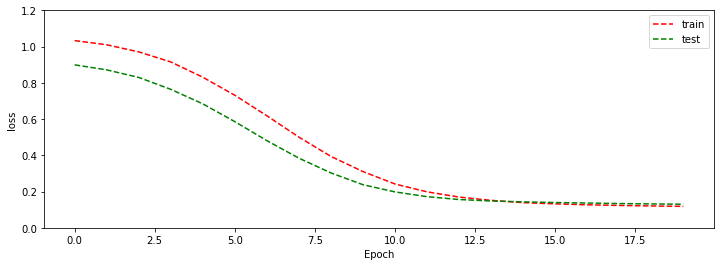

In [70]:
draw_curves(history, key1='accuracy', ylim1=(-0.1, 1.2), key2='loss', ylim2=(0.0, 1.2))

In [ ]:

# Defining a function to find the best parameters for ANN
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50, 100]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model

            # Defining the Second layer of the model

            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number


            # Compiling the model
            
            # Fitting the ANN to the Training set

            MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))
            # printing the results of the current iteration
            
            SearchResultsData = SearchResultsData.append(pd.DataFrame(
                data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                             columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    
    return(SearchResultsData)

######################################################
# Calling the function
ResultsData = FunctionFindBestParams(X_train, y_train, X_test, y_test)

# Function to generate Deep ANN model 
def make_regression_ann(Optimizer_trial):
    from keras.models import Sequential
    from keras.layers import Dense
    
    model = Sequential()

    return model

# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 15, epochs = 5, verbose=0)

# Generating Predictions on testing data
Predictions=model.predict(X_test)

# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)

# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)

print("########## Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes')

print('### Printing Best parameters ###')
grid_search.best_params_
# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Price']=y_test_orig
TestingData['PredictedPrice']=Predictions
TestingData.head()


# Computing the absolute percent error
APE=100*(abs(TestingData['Price']-TestingData['PredictedPrice'])/TestingData['Price'])
TestingData['APE']=APE

print('The Accuracy of ANN model is:', 100-np.mean(APE))
TestingData.head()
###########################################
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

# Listing all the parameters to try
Parameter_Trials={'batch_size':[10,20,30],
                    'epochs':[10,20],
                    'Optimizer_trial':['adam', 'rmsprop']
                }

# Creating the regression ANN model
RegModel=KerasRegressor(make_regression_ann, verbose=0)

###########################################
from sklearn.metrics import make_scorer

# Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)


"""
Porównać wyniki z regresją liniową! (w zad.5 porównać wyniki z regresją logarytmiczną)
"""


Refernces:
- <https://www.analyticsvidhya.com/blog/2021/07/car-price-prediction-machine-learning-vs-deep-learning/>
- <https://www.kaggle.com/code/karan842/car-price-prediction-neural-network>
- <https://thecleverprogrammer.com/2020/09/21/predict-car-prices-with-machine-learning/>